In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stat
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
from google.colab import files
uploaaded=files.upload()


Saving data.xlsx to data.xlsx


In [4]:
import pandas as pd
import re

# Load raw data
df = pd.read_excel("data.xlsx")
df = df.dropna()

# Clean column names
df.columns = df.columns.str.strip()

# Clean text fields
text_cols = ['Title', 'What Is your Company', 'Work Type', 'Work Hour', 'City of Company site']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Filter tech-related job titles
tech_keywords = [
    'developer', 'engineer', 'data', 'software', 'frontend', 'backend',
    'full stack', 'devops', 'qa', 'security', 'network', 'cloud', 'programmer', 'ai', 'ml'
]
df = df[df['Title'].apply(lambda x: any(keyword in x for keyword in tech_keywords))]

# Define Egyptian cities
egyptian_cities = {
    'cairo', 'giza', 'alexandria', 'mansoura', 'assiut', 'aswan', 'beni suef', 'damietta',
    'fayoum', 'ismailia', 'kafr el-sheikh', 'luxor', 'minya', 'port said', 'sharqia',
    'sohag', 'tanta', 'zagazig', '6th of october', 'new cairo', 'nasr city', 'maadi'
}

# Filter based on actual city in Egypt
is_egyptian_city = df['City of Company site'].apply(lambda city: any(ecity in city for ecity in egyptian_cities))

# Exclude phrases that indicate location outside Egypt
exclusion_phrases = ['site out of egypt', 'outside egypt', 'not egyptian and site out of egypt']
not_outside_egypt = ~df['What Is your Company'].apply(lambda x: any(phrase in x for phrase in exclusion_phrases))

# Apply location filtering
df = df[is_egyptian_city & not_outside_egypt]

# Drop irrelevant columns
for col in ['Date of Salary', 'طابع زمني']:
    if col in df.columns:
        df = df.drop(columns=[col])

# Normalize "What Is your Company"
def normalize_company(value):
    value = value.strip().lower()
    if 'not' in value and 'site out of egypt' in value:
        return 'non-egyptian-outside'
    elif 'not' in value and 'site in egypt' in value:
        return 'non-egyptian-inside'
    elif 'egypt' in value:
        return 'egyptian'
    else:
        return 'unknown'

df['What Is your Company'] = df['What Is your Company'].apply(normalize_company)

# Normalize "Years of Experiences"
df['Years of Experiences'] = df['Years of Experiences'].astype(str).str.strip().str.lower()

def normalize_experience(value):
    try:
        if 'month' in value:
            months = re.findall(r'\d+', value)
            return float(months[0]) / 12 if months else None
        years = re.findall(r'\d+\.?\d*', value)
        return float(years[0]) if years else None
    except:
        return None

df['Years of Experiences'] = df['Years of Experiences'].apply(normalize_experience)

# Clean and normalize Salary
df['Salary'] = df['Salary'].astype(str).str.strip().str.lower()

def clean_salary(value):
    try:
        val = str(value).lower().strip()
        if 'k' in val:
            val = val.replace('k', '')
            return float(val) * 1000
        if 'usd' in val or '$' in val:
            val = re.sub(r'[^\d.]', '', val)
            return float(val) * 50  # Convert USD to EGP (assumed rate)
        val = re.sub(r'[^\d.]', '', val)
        if val == '':
            return None
        num = float(val)
        if num < 100:  # Assume it's in thousands
            return num * 1000
        return num
    except:
        return None

df['Salary'] = df['Salary'].apply(clean_salary)

# Save cleaned data
df.to_csv("fully_cleaned_data.csv", index=False)
print("✅ Data cleaned and saved as fully_cleaned_data.csv")


✅ Data cleaned and saved as fully_cleaned_data.csv


In [5]:
print (df.head)

<bound method NDFrame.head of                                 Title  Years of Experiences   Salary  \
0                    dotnet developer              2.000000   8000.0   
2                   android developer              1.000000  10000.0   
3                     devops engineer              0.083333  10000.0   
6         frontend developer | vue.js              0.000000   5000.0   
9                   dot net developer              0.166667   6000.0   
...                               ...                   ...      ...   
1323               software developer              4.000000  45000.0   
1324             embedded sw engineer              0.000000  10000.0   
1325                    php developer              1.000000  10000.0   
1326  c++ software development intern              0.000000    100.0   
1330                  devops engineer              1.000000  29000.0   

     What Is your Company Work Type  Work Hour City of Company site  
0                egyptian    hybird

In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 0 to 1330
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 603 non-null    object 
 1   Years of Experiences  591 non-null    float64
 2   Salary                593 non-null    float64
 3   What Is your Company  603 non-null    object 
 4   Work Type             603 non-null    object 
 5   Work Hour             603 non-null    object 
 6   City of Company site  603 non-null    object 
dtypes: float64(2), object(5)
memory usage: 37.7+ KB
None


In [7]:
df.head(50)  # Shows the first 10 rows


,Title,Years of Experiences,Salary,What Is your Company,Work Type,Work Hour,City of Company site
0,dotnet developer,2.000000,8000.0,egyptian,hybird,full time,cairo
2,android developer,1.000000,10000.0,egyptian,hybird,full time,cairo
3,devops engineer,0.083333,10000.0,egyptian,on site,full time,assiut
6,frontend developer | vue.js,0.000000,5000.0,non-egyptian-inside,on site,full time,mansoura
9,dot net developer,0.166667,6000.0,egyptian,on site,full time,mansoura
10,raact developer,1.000000,15000.0,egyptian,remotley,full time,cairo
11,full stack developer,2.000000,5000.0,egyptian,remotley,full time,cairo
16,full stack developer,3.000000,21000.0,egyptian,hybird,full time,cairo
17,backend .netasp,1.000000,800012000.0,egyptian,on site,full time,cairo
18,data engineer,1.000000,NaN,egyptian,hybird,full time,"cairo, riyadh"


In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 0 to 1330
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 603 non-null    object 
 1   Years of Experiences  591 non-null    float64
 2   Salary                593 non-null    float64
 3   What Is your Company  603 non-null    object 
 4   Work Type             603 non-null    object 
 5   Work Hour             603 non-null    object 
 6   City of Company site  603 non-null    object 
dtypes: float64(2), object(5)
memory usage: 37.7+ KB
None


In [9]:
df.shape

(603, 7)

In [10]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 5 categorical variables

The categorical variables are :

 ['Title', 'What Is your Company', 'Work Type', 'Work Hour', 'City of Company site']


In [11]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 2 numerical variables

The numerical variables are : ['Years of Experiences', 'Salary']


In [12]:
df.isnull().sum()

,0
Title,0
Years of Experiences,12
Salary,10
What Is your Company,0
Work Type,0
Work Hour,0
City of Company site,0


In [13]:
# Fill missing experience with 0 (assuming no experience)
df['Years of Experiences'] = df['Years of Experiences'].fillna(0)

# If experience is 0 and salary is missing, assume no salary
df.loc[(df['Years of Experiences'] == 0) & (df['Salary'].isnull()), 'Salary'] = 0

# Fill any remaining missing salaries with median
df['Salary'] = df['Salary'].fillna(df['Salary'].median())


In [14]:
df.isnull().sum()

,0
Title,0
Years of Experiences,0
Salary,0
What Is your Company,0
Work Type,0
Work Hour,0
City of Company site,0


In [15]:
df.head(40)  # Shows the first 10 rows


,Title,Years of Experiences,Salary,What Is your Company,Work Type,Work Hour,City of Company site
0,dotnet developer,2.000000,8000.0,egyptian,hybird,full time,cairo
2,android developer,1.000000,10000.0,egyptian,hybird,full time,cairo
3,devops engineer,0.083333,10000.0,egyptian,on site,full time,assiut
6,frontend developer | vue.js,0.000000,5000.0,non-egyptian-inside,on site,full time,mansoura
9,dot net developer,0.166667,6000.0,egyptian,on site,full time,mansoura
10,raact developer,1.000000,15000.0,egyptian,remotley,full time,cairo
11,full stack developer,2.000000,5000.0,egyptian,remotley,full time,cairo
16,full stack developer,3.000000,21000.0,egyptian,hybird,full time,cairo
17,backend .netasp,1.000000,800012000.0,egyptian,on site,full time,cairo
18,data engineer,1.000000,16000.0,egyptian,hybird,full time,"cairo, riyadh"


In [16]:
df = df.reset_index(drop=True)


In [17]:
# Final cleanup: reset index
df = df.reset_index(drop=True)

# Save cleaned and reindexed data
df.to_csv("fully_cleaned_data.csv", index=False)
print("Cleaned data saved with reset index.")


Cleaned data saved with reset index.


In [18]:
df.head(40)  # Shows the first 10 rows


,Title,Years of Experiences,Salary,What Is your Company,Work Type,Work Hour,City of Company site
0,dotnet developer,2.000000,8000.0,egyptian,hybird,full time,cairo
1,android developer,1.000000,10000.0,egyptian,hybird,full time,cairo
2,devops engineer,0.083333,10000.0,egyptian,on site,full time,assiut
3,frontend developer | vue.js,0.000000,5000.0,non-egyptian-inside,on site,full time,mansoura
4,dot net developer,0.166667,6000.0,egyptian,on site,full time,mansoura
5,raact developer,1.000000,15000.0,egyptian,remotley,full time,cairo
6,full stack developer,2.000000,5000.0,egyptian,remotley,full time,cairo
7,full stack developer,3.000000,21000.0,egyptian,hybird,full time,cairo
8,backend .netasp,1.000000,800012000.0,egyptian,on site,full time,cairo
9,data engineer,1.000000,16000.0,egyptian,hybird,full time,"cairo, riyadh"


                                    Title job_role_abbr
0                        dotnet developer           d_d
1                       android developer           a_d
2                         devops engineer           d_e
3             frontend developer | vue.js       f_d_|_v
4                       dot net developer         d_n_d
..                                    ...           ...
591  frontend developer | react developer     f_d_|_r_d
593          font end developer (angular)       f_e_d_(
594           embedded software developer         e_s_d
599                  embedded sw engineer         e_s_e
601       c++ software development intern       c_s_d_i

[308 rows x 2 columns]


In [19]:
df.head(40)  # Shows the first 10 rows


,Title,Years of Experiences,Salary,What Is your Company,Work Type,Work Hour,City of Company site
0,dotnet developer,2.000000,8000.0,egyptian,hybird,full time,cairo
1,android developer,1.000000,10000.0,egyptian,hybird,full time,cairo
2,devops engineer,0.083333,10000.0,egyptian,on site,full time,assiut
3,frontend developer | vue.js,0.000000,5000.0,non-egyptian-inside,on site,full time,mansoura
4,dot net developer,0.166667,6000.0,egyptian,on site,full time,mansoura
5,raact developer,1.000000,15000.0,egyptian,remotley,full time,cairo
6,full stack developer,2.000000,5000.0,egyptian,remotley,full time,cairo
7,full stack developer,3.000000,21000.0,egyptian,hybird,full time,cairo
8,backend .netasp,1.000000,800012000.0,egyptian,on site,full time,cairo
9,data engineer,1.000000,16000.0,egyptian,hybird,full time,"cairo, riyadh"


In [20]:
print(df.columns)


Index(['Title', 'Years of Experiences', 'Salary', 'What Is your Company',
       'Work Type', 'Work Hour', 'City of Company site'],
      dtype='object')


In [21]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)


In [22]:
df.rename(columns={'salary': 'Salary'}, inplace=True)


In [23]:
print(df['Salary'].head(10))
print(df['Salary'].dtype)


0         8000.0
1        10000.0
2        10000.0
3         5000.0
4         6000.0
5        15000.0
6         5000.0
7        21000.0
8    800012000.0
9        16000.0
Name: Salary, dtype: float64
float64


In [24]:
# Remove commas and convert to numeric
df['Salary'] = df['Salary'].astype(str).str.replace(',', '')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')


In [25]:
print(df['Salary'].describe())


count    6.030000e+02
mean     6.880568e+06
std      9.189399e+07
min      0.000000e+00
25%      1.000000e+04
50%      1.600000e+04
75%      2.815000e+04
max      1.500020e+09
Name: Salary, dtype: float64


In [26]:
# Get all unique job titles that include 'developer'
dev_titles = df[df['title'].str.lower().str.contains('developer')]['title'].unique()
print("Developer-related titles in the dataset:")
for title in dev_titles:
    print("-", title)


Developer-related titles in the dataset:
- dotnet developer
- android developer
- frontend developer | vue.js
- dot net developer
- raact developer
- full stack developer
- ios developer
- php developer
- backend developer
- flutter developer
- senior backend .netdeveloper
- laravel developer
- oracle developer
- java developer
- junior web developer
- mern stack developer
- front end developer angular
- .net developer
- senior full stack developer
- frontend developer
- integration developer
- sr. business intelligence developer
- nodejs developer
- erp developer
- software developer
- bi developer
- back-end developer
- juniot front end developer
- full stack .net developer
- frontend developer react
- netsuite technical developer (javascript developer)
- fullstack developer
- frontend developer (angular)
- react developer
- .net developer backend
- php developer laravel
- php backend developer
- java spring developer
- python developer
- apm developer
- php/wordpress developer
- bi 

In [27]:
df.columns = df.columns.str.strip().str.lower()


In [28]:
# Keep only rows where 'title' includes 'developer'
df = df[df['title'].str.contains('developer', case=False, na=False)]


In [29]:
df.reset_index(drop=True, inplace=True)


In [30]:
def classify_developer(title):
    title = title.lower()

    if any(x in title for x in ['frontend', 'react', 'angular', 'vue']):
        return 'frontend'
    elif any(x in title for x in ['backend', 'django', 'php', 'node', 'spring', '.net', 'flask', 'java ', 'c#', 'python']):
        return 'backend'
    elif any(x in title for x in ['android', 'ios', 'flutter', 'react native']):
        return 'mobile'
    elif any(x in title for x in ['full stack', 'fullstack', 'mern', 'mean']):
        return 'full_stack'
    elif any(x in title for x in ['bi', 'business intelligence']):
        return 'data_bi'
    elif any(x in title for x in ['outsystems', 'bpm', 'remedy', 'low code']):
        return 'low_code'
    elif 'embedded' in title:
        return 'embedded'
    elif any(x in title for x in ['crm', 'siebel', 'odoo', 'erp']):
        return 'crm'
    elif 'game' in title:
        return 'game'
    elif title.strip() in ['developer', 'software developer', 'software developers']:
        return 'general'
    else:
        return 'other'


In [31]:
df['developer_type'] = df['title'].apply(classify_developer)


In [32]:
print(df['developer_type'].value_counts())


developer_type
backend       107
other          56
mobile         44
frontend       42
full_stack     23
data_bi        12
general         9
crm             6
low_code        5
embedded        2
Name: count, dtype: int64


<ipython-input-33-6b211cb89904>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='developer_type', order=df['developer_type'].value_counts().index, palette='Set2')


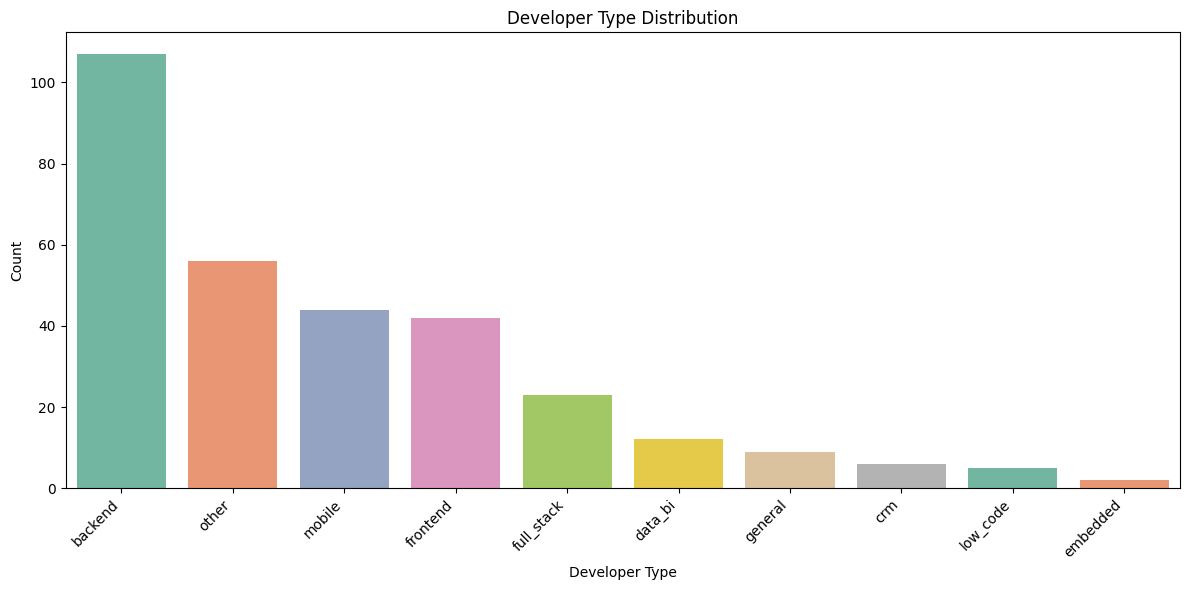

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='developer_type', order=df['developer_type'].value_counts().index, palette='Set2')
plt.title('Developer Type Distribution')
plt.xlabel('Developer Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [34]:
# Show unique job titles that were classified as 'other'
others = df[df['developer_type'] == 'other']['title'].unique()

print("Titles classified as 'other':")
for title in others:
    print("-", title)


Titles classified as 'other':
- dotnet developer
- dot net developer
- raact developer
- laravel developer
- oracle developer
- junior web developer
- integration developer
- back-end developer
- juniot front end developer
- netsuite technical developer (javascript developer)
- apm developer
- gis developer
- frappe developer
- senior full stake developer
- front-end developer
- full-stack developer
- front end developer
- rpa developer
- wep developer
- senior rpa developer
- ai developer
- brand developer
- javascript developer
- oracle apex developer
- . net developer
- wordpress developer
- web developer
- system integration developer
- c++ developer
- sr. rpa developer
- sap application developer
- junior front end developer
- backed developer c sharp
- web gis developer
- mearn stack -front end developer
- business developer
- senior dot net developer
- principal dotnet developer
- fluuter developer


In [35]:
def classify_developer(title):
    title = title.lower()

    # Correct common typos before classification
    title = title.replace('raact', 'react')
    title = title.replace('fluuter', 'flutter')
    title = title.replace('wep', 'web')
    title = title.replace('juniot', 'junior')
    title = title.replace('mearn', 'mern')
    title = title.replace('back-end', 'backend')
    title = title.replace('front-end', 'frontend')
    title = title.replace('. net', '.net')
    title = title.replace('dot net', '.net')
    title = title.replace('dotnet', '.net')

    # Classifications
    if any(x in title for x in ['frontend', 'front end', 'react', 'angular', 'vue', 'javascript']):
        return 'frontend'
    elif any(x in title for x in ['backend', 'django', 'php', 'node', 'spring', '.net', 'flask', 'java ', 'c#', 'python', 'laravel', 'oracle', 'wordpress']):
        return 'backend'
    elif any(x in title for x in ['android', 'ios', 'flutter', 'react native']):
        return 'mobile'
    elif any(x in title for x in ['full stack', 'fullstack', 'mern', 'mean']):
        return 'full_stack'
    elif any(x in title for x in ['bi', 'business intelligence']):
        return 'data_bi'
    elif any(x in title for x in ['outsystems', 'bpm', 'remedy', 'low code', 'rpa']):
        return 'low_code'
    elif 'embedded' in title:
        return 'embedded'
    elif any(x in title for x in ['crm', 'siebel', 'odoo', 'erp']):
        return 'crm'
    elif 'game' in title:
        return 'game'
    elif title.strip() in ['developer', 'software developer', 'software developers']:
        return 'general'
    else:
        return 'other'


In [36]:
df['developer_type'] = df['title'].apply(classify_developer)


In [37]:
print("Still unclassified titles (other):")
print(df[df['developer_type'] == 'other']['title'].unique())


Still unclassified titles (other):
['junior web developer' 'integration developer' 'apm developer'
 'gis developer' 'frappe developer' 'senior full stake developer'
 'full-stack developer' 'wep developer' 'ai developer' 'brand developer'
 'web developer' 'system integration developer' 'c++ developer'
 'sap application developer' 'backed developer c sharp'
 'web gis developer' 'business developer']


<ipython-input-38-6b211cb89904>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='developer_type', order=df['developer_type'].value_counts().index, palette='Set2')


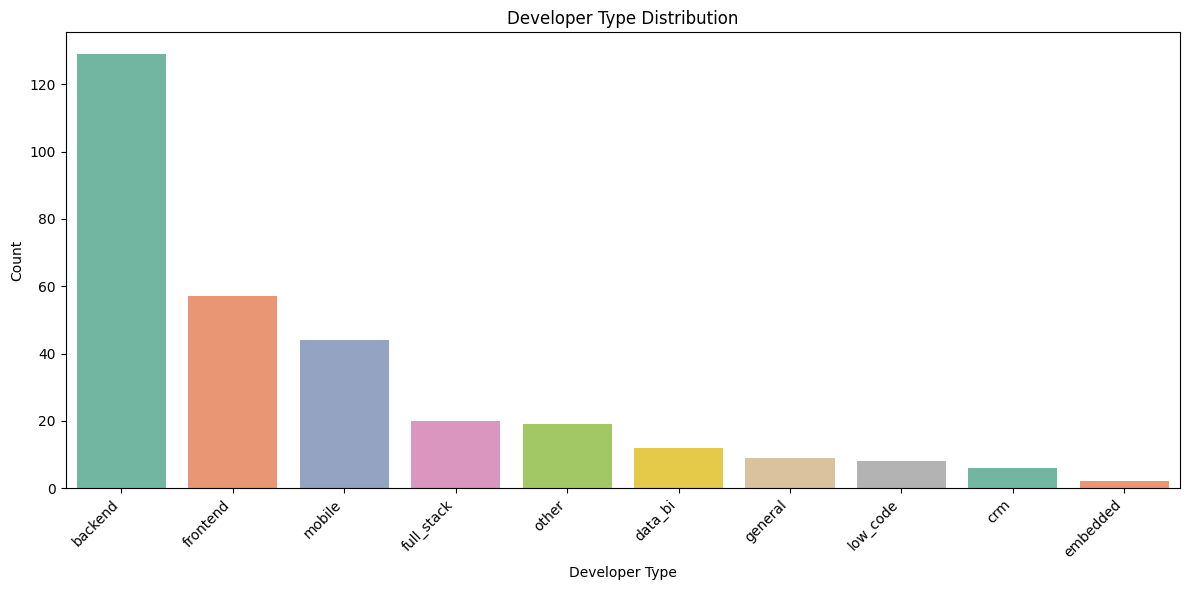

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='developer_type', order=df['developer_type'].value_counts().index, palette='Set2')
plt.title('Developer Type Distribution')
plt.xlabel('Developer Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [39]:
# Filter out unrealistically high salaries (outliers)
df_filtered = df[df['salary'] < 200000]


In [40]:
# Recalculate stats after filtering
group_stats = df_filtered.groupby('developer_type').agg(
    count=('salary', 'count'),
    avg_salary=('salary', 'mean')
).sort_values(by='avg_salary', ascending=False)

# Normalize count for color scale
norm = colors.Normalize(vmin=group_stats['count'].min(), vmax=group_stats['count'].max())
bar_colors = cm.viridis(norm(group_stats['count']))

# Replot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(group_stats.index, group_stats['avg_salary'], color=bar_colors)

# Colorbar
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Number of Workers in Group')

# Labels
ax.set_title('Average Salary per Developer Type (Filtered, Color = Group Size)')
ax.set_xlabel('Developer Type')
ax.set_ylabel('Average Salary (EGP)')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'colors' is not defined

<ipython-input-41-9550366c4e95>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_filtered, x='developer_type', y='salary', jitter=True, alpha=0.5, palette='Set2')
<ipython-input-41-9550366c4e95>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_filtered, x='developer_type', y='salary', estimator='mean', color='black', join=False, markers='D', ci=None)
<ipython-input-41-9550366c4e95>:3: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df_filtered, x='developer_type', y='salary', estimator='mean', color='black', join=False, markers='D', ci=None)


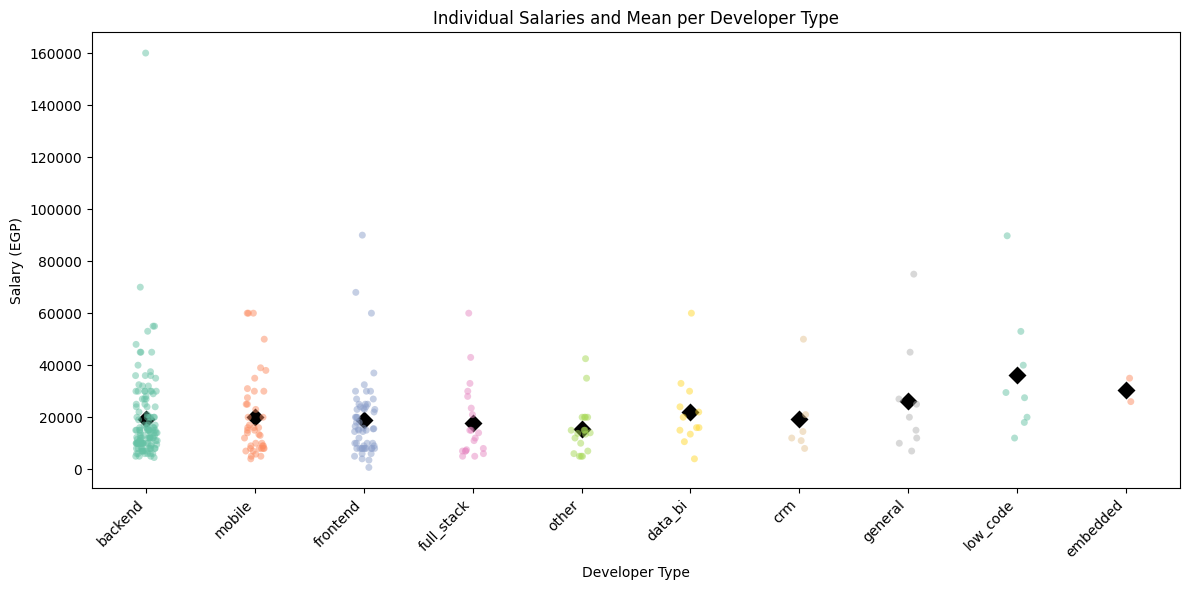

In [41]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df_filtered, x='developer_type', y='salary', jitter=True, alpha=0.5, palette='Set2')
sns.pointplot(data=df_filtered, x='developer_type', y='salary', estimator='mean', color='black', join=False, markers='D', ci=None)

plt.title('Individual Salaries and Mean per Developer Type')
plt.xlabel('Developer Type')
plt.ylabel('Salary (EGP)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [42]:
from scipy.stats import f_oneway

# Filter out outliers
df_filtered = df[df['salary'] < 200000]

# Group salaries by developer type
anova_data = df_filtered[['developer_type', 'salary']].dropna()
groups = [group['salary'].values for name, group in anova_data.groupby('developer_type')]

# Run ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("✅ Reject the null hypothesis: At least one developer group has a significantly different average salary.")
else:
    print("❌ Fail to reject the null hypothesis: No significant difference between group averages.")


ANOVA F-statistic: 1.34
P-value: 0.2150
❌ Fail to reject the null hypothesis: No significant difference between group averages.


In [43]:
df.columns = df.columns.str.replace(r'\s+', '_', regex=True).str.strip().str.lower()


In [44]:
print(df.columns.tolist())


['title', 'years_of_experiences', 'salary', 'what_is_your_company', 'work_type', 'work_hour', 'city_of_company_site', 'developer_type']


In [45]:
df_filtered = df[df['salary'] < 200000].copy()


In [46]:
bins = [0, 1, 3, df_filtered['years_of_experiences'].max()]
labels = ['0–1 yrs', '2–3 yrs', '3+ yrs']
df_filtered['experience_group'] = pd.cut(df_filtered['years_of_experiences'], bins=bins, labels=labels, include_lowest=True)


<ipython-input-47-e1a25eac58f4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='experience_group', y='salary', palette='pastel')


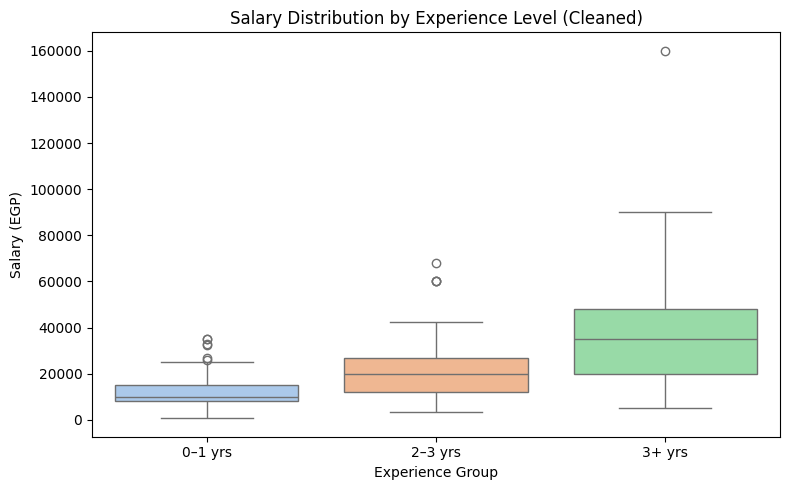

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='experience_group', y='salary', palette='pastel')

plt.title('Salary Distribution by Experience Level (Cleaned)')
plt.xlabel('Experience Group')
plt.ylabel('Salary (EGP)')
plt.tight_layout()
plt.show()


<ipython-input-48-0c5e5168f3cf>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_filtered, x='experience_group', y='salary', estimator='mean', palette='Set2', ci=None)
<ipython-input-48-0c5e5168f3cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='experience_group', y='salary', estimator='mean', palette='Set2', ci=None)


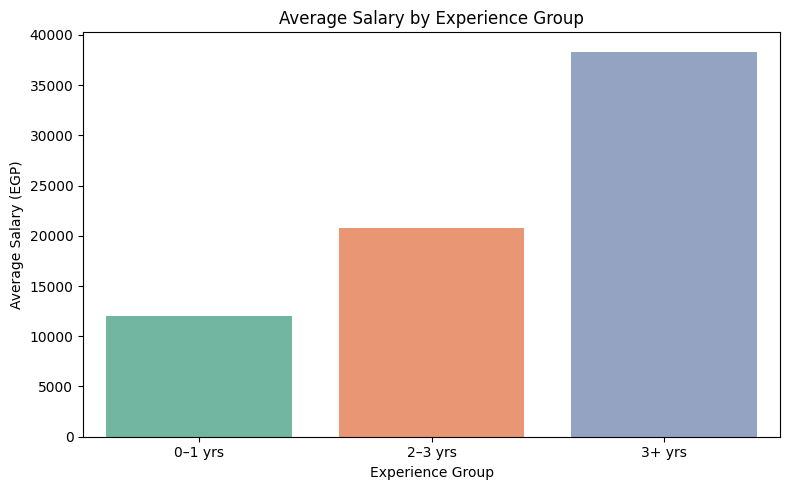

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=df_filtered, x='experience_group', y='salary', estimator='mean', palette='Set2', ci=None)

# Add labels and title
plt.title('Average Salary by Experience Group')
plt.xlabel('Experience Group')
plt.ylabel('Average Salary (EGP)')
plt.tight_layout()
plt.show()


In [49]:
from scipy.stats import f_oneway

# Drop missing values
anova_data = df_filtered[['experience_group', 'salary']].dropna()

# Group salary values by experience group
groups = [group['salary'].values for name, group in anova_data.groupby('experience_group')]

# Run the one-way ANOVA test
f_stat, p_value = f_oneway(*groups)

# Print results
print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.200f}")

# Interpretation
if p_value < 0.05:
    print("✅ Reject the null hypothesis: Experience level significantly affects salary.")
else:
    print("❌ Fail to reject the null hypothesis: No significant salary difference between experience groups.")


ANOVA F-statistic: 77.35
P-value: 0.00000000000000000000000000084353257490013594904079923685807719966744031845986670825839218727475171807558829151219015329843387007713317871093750000000000000000000000000000000000000000000000000000000000
✅ Reject the null hypothesis: Experience level significantly affects salary.


<ipython-input-49-fe8369ca602e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['salary'].values for name, group in anova_data.groupby('experience_group')]


In [50]:
print(df['work_type'].value_counts())


work_type
hybird                                                129
on site                                               115
remotley                                               60
used to be onsite but now im remotley                   1
flexible hours ( from home & the office as i like)      1
Name: count, dtype: int64


In [51]:
print(df_filtered['work_type'].unique())


['hybird' 'on site' 'remotley' 'used to be onsite but now im remotley'
 'flexible hours ( from home & the office as i like)']


In [52]:
df_filtered['work_type'] = df_filtered['work_type'].str.strip().str.lower().str.replace(' ', '_')


In [53]:
# Step 1: Normalize case and spacing
df_filtered['work_type'] = df_filtered['work_type'].str.strip().str.lower().str.replace(' ', '_')

# Step 2: Map typos and variations to standard categories
df_filtered['work_type'] = df_filtered['work_type'].replace({
    'hybird': 'hybrid',
    'remotley': 'remotely',
    'used_to_be_onsite_but_now_im_remotley': 'remotely',
    'flexible_hours_(_from_home_&_the_office_as_i_like)': 'remotely'
})


<ipython-input-54-027d2f96aeed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered[df_filtered['work_type'].isin(['on_site', 'hybrid', 'remotely'])],


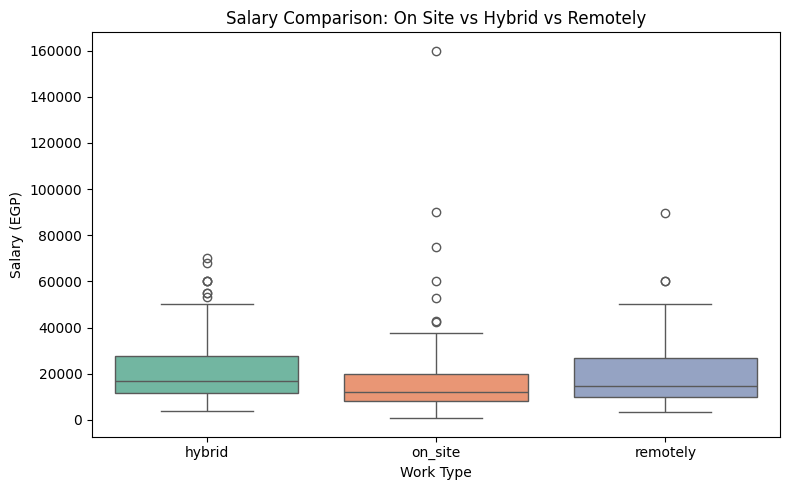

In [54]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered[df_filtered['work_type'].isin(['on_site', 'hybrid', 'remotely'])],
            x='work_type', y='salary', palette='Set2')

plt.title('Salary Comparison: On Site vs Hybrid vs Remotely')
plt.xlabel('Work Type')
plt.ylabel('Salary (EGP)')
plt.tight_layout()
plt.show()


<ipython-input-55-f2435575687a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-55-f2435575687a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


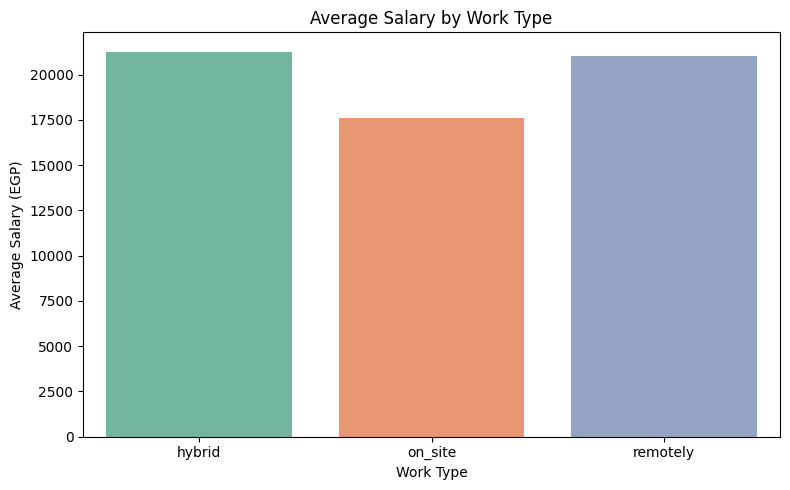

In [55]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_filtered[df_filtered['work_type'].isin(['on_site', 'hybrid', 'remotely'])],
    x='work_type', y='salary', estimator='mean', ci=None, palette='Set2'
)

plt.title('Average Salary by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Average Salary (EGP)')
plt.tight_layout()
plt.show()


In [56]:
from scipy.stats import f_oneway

# Filter only the relevant work types
work_data = df_filtered[df_filtered['work_type'].isin(['on_site', 'hybrid', 'remotely'])]

# Group salaries by work type
groups = [group['salary'].values for name, group in work_data.groupby('work_type') if len(group) >= 2]

# Run the ANOVA test
f_stat, p_value = f_oneway(*groups)

# Show result
print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Reject the null hypothesis: At least one work type has a different average salary.")
else:
    print("❌ Fail to reject the null hypothesis: No significant salary difference between work types.")


ANOVA F-statistic: 1.66
P-value: 0.1925
❌ Fail to reject the null hypothesis: No significant salary difference between work types.


In [57]:
# Drop missing salary values just in case
salaries = df_filtered['salary'].dropna()

# Compute global stats
mean_salary = salaries.mean()
median_salary = salaries.median()
mode_salary = salaries.mode().iloc[0] if not salaries.mode().empty else None

# Print the results
print(f"📊 Global Salary Statistics:")
print(f"Mean Salary: {mean_salary:.2f} EGP")
print(f"Median Salary: {median_salary:.2f} EGP")
print(f"Mode Salary: {mode_salary:.2f} EGP")


📊 Global Salary Statistics:
Mean Salary: 19863.08 EGP
Median Salary: 15000.00 EGP
Mode Salary: 8000.00 EGP


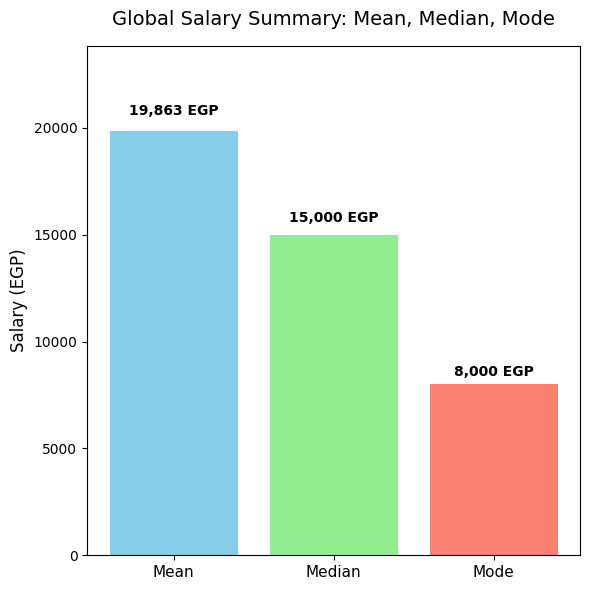

In [58]:
import matplotlib.pyplot as plt

# Prepare data
labels = ['Mean', 'Median', 'Mode']
values = [mean_salary, median_salary, mode_salary]

# Create figure with better proportions
plt.figure(figsize=(6, 6))
bars = plt.bar(labels, values, color=['skyblue', 'lightgreen', 'salmon'])

# Add value labels above bars with padding
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             yval + (yval * 0.03),  # 3% above the bar
             f'{yval:,.0f} EGP',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add title and labels with padding
plt.title('Global Salary Summary: Mean, Median, Mode', fontsize=14, pad=15)
plt.ylabel('Salary (EGP)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.ylim(0, max(values) * 1.2)  # Add space above tallest bar
plt.tight_layout()
plt.show()


In [59]:
# Define city groups
urban = ['cairo', 'alexandria', 'giza']
developing = ['assiut', 'mansoura', 'new damietta', 'aswan', 'tanta', 'mansouradakhlia']

# Create a new column to label them
df_filtered['region_type'] = df_filtered['city_of_company_site'].apply(
    lambda x: 'urban' if x in urban else ('developing' if x in developing else 'other')
)

# Optional: filter to only these two groups
region_df = df_filtered[df_filtered['region_type'].isin(['urban', 'developing'])]


<ipython-input-60-a53d0b3f5734>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_df, x='region_type', y='salary', palette='Set2', errorbar='sd')


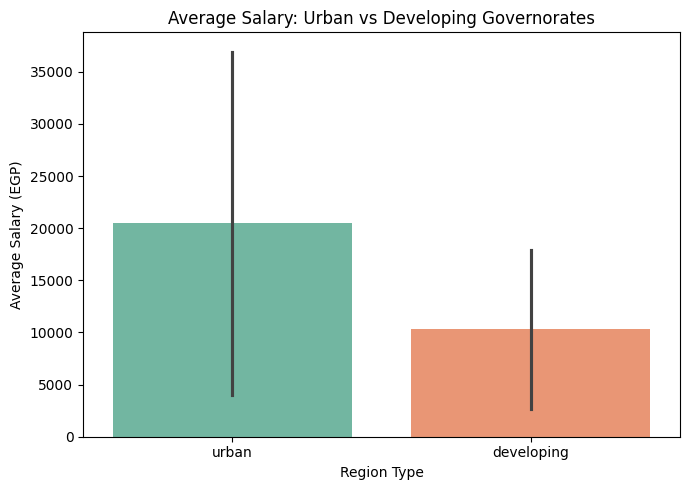

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.barplot(data=region_df, x='region_type', y='salary', palette='Set2', errorbar='sd')

plt.title('Average Salary: Urban vs Developing Governorates')
plt.xlabel('Region Type')
plt.ylabel('Average Salary (EGP)')
plt.tight_layout()
plt.show()


<ipython-input-61-850462249e69>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


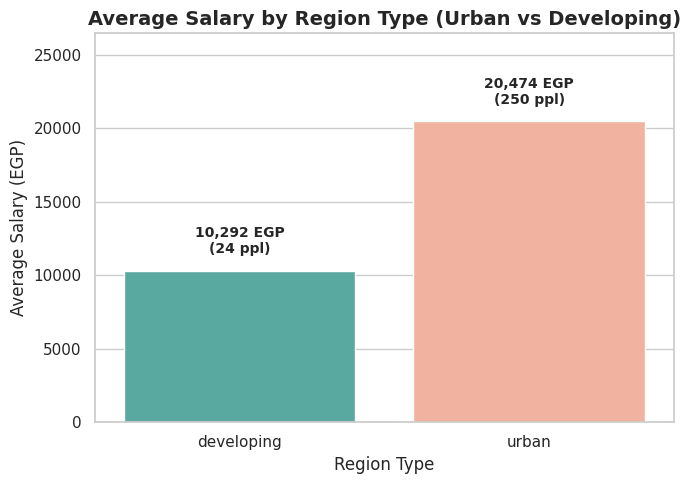

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set(style='whitegrid')

# Calculate mean salary and count per region
group_stats = region_df.groupby('region_type').agg(
    mean_salary=('salary', 'mean'),
    count=('salary', 'count')
).reset_index()

# Bar chart
plt.figure(figsize=(7, 5))
bars = sns.barplot(
    data=group_stats,
    x='region_type',
    y='mean_salary',
    palette=['#4db6ac', '#ffab91']
)

# Add value and count labels
for bar, count in zip(bars.patches, group_stats['count']):
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1000,
        f"{height:,.0f} EGP\n({count} ppl)",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Titles and labels
plt.title("Average Salary by Region Type (Urban vs Developing)", fontsize=14, weight='bold')
plt.ylabel("Average Salary (EGP)", fontsize=12)
plt.xlabel("Region Type", fontsize=12)
plt.ylim(0, group_stats['mean_salary'].max() + 6000)
plt.tight_layout()
plt.show()


In [62]:
from scipy.stats import ttest_ind

urban_salaries = region_df[region_df['region_type'] == 'urban']['salary'].dropna()
developing_salaries = region_df[region_df['region_type'] == 'developing']['salary'].dropna()

t_stat, p_value = ttest_ind(urban_salaries, developing_salaries, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.20f}")

if p_value < 0.05:
    print("✅ Significant difference in salaries between Urban and Developing regions.")
else:
    print("❌ No significant difference in salaries between Urban and Developing regions.")


T-statistic: 5.45
P-value: 0.00000172983717580088
✅ Significant difference in salaries between Urban and Developing regions.


<ipython-input-63-9d4db2d704e1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='work_hour', y='salary', palette='Set2')


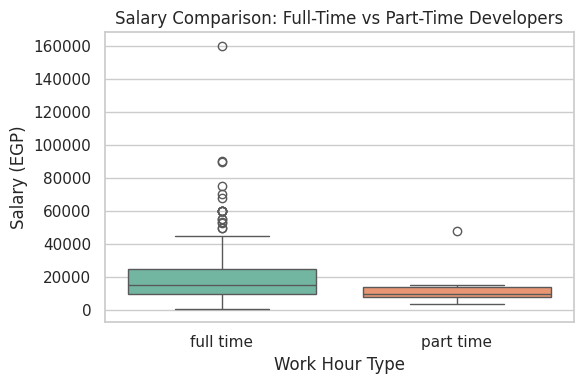

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Normalize the work_hour column
df_filtered['work_hour'] = df_filtered['work_hour'].str.strip().str.lower()

# Step 2: Filter only full-time and part-time
plot_data = df_filtered[df_filtered['work_hour'].isin(['full time', 'part time'])]

# Step 3: Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=plot_data, x='work_hour', y='salary', palette='Set2')

plt.title('Salary Comparison: Full-Time vs Part-Time Developers')
plt.xlabel('Work Hour Type')
plt.ylabel('Salary (EGP)')
plt.tight_layout()
plt.show()


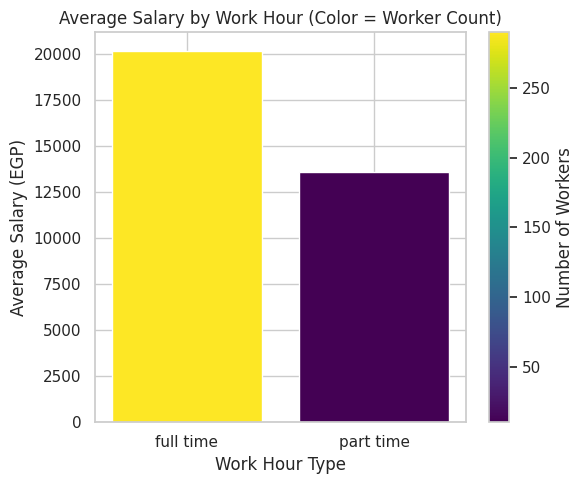

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Clean and filter data
df_filtered['work_hour'] = df_filtered['work_hour'].str.strip().str.lower()
hour_stats = df_filtered[df_filtered['work_hour'].isin(['full time', 'part time'])] \
    .groupby('work_hour')['salary'].agg(
        avg_salary='mean',
        worker_count='count'
    ).sort_values(by='avg_salary', ascending=False)

# Step 2: Normalize colors based on worker count
norm = plt.Normalize(hour_stats['worker_count'].min(), hour_stats['worker_count'].max())
cmap = plt.cm.viridis
colors = cmap(norm(hour_stats['worker_count']))

# Step 3: Create bar plot
fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(hour_stats.index, hour_stats['avg_salary'], color=colors)

# Step 4: Add colorbar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Number of Workers')

# Labels and formatting
ax.set_title('Average Salary by Work Hour (Color = Worker Count)')
ax.set_xlabel('Work Hour Type')
ax.set_ylabel('Average Salary (EGP)')
plt.tight_layout()
plt.show()


In [65]:
from scipy.stats import ttest_ind

# Step 1: Normalize the column
df_filtered['work_hour'] = df_filtered['work_hour'].str.strip().str.lower()

# Step 2: Filter full-time and part-time developers
full_time = df_filtered[df_filtered['work_hour'] == 'full time']['salary'].dropna()
part_time = df_filtered[df_filtered['work_hour'] == 'part time']['salary'].dropna()

# Step 3: Perform Welch's t-test (default assumes unequal variance)
t_stat, p_value = ttest_ind(full_time, part_time, equal_var=False)

# Step 4: Output
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Reject the null hypothesis: Full-time and part-time developers have significantly different average salaries.")
else:
    print("❌ Fail to reject the null hypothesis: No significant salary difference between full-time and part-time developers.")


T-statistic: 1.60
P-value: 0.1401
❌ Fail to reject the null hypothesis: No significant salary difference between full-time and part-time developers.


In [66]:
# Step 1: Calculate mean and median for all numeric columns
mean_values = df_filtered.mean(numeric_only=True)
median_values = df_filtered.median(numeric_only=True)

# Step 2: Calculate mode (can return multiple values, so pick the first mode)
mode_values = df_filtered.mode(numeric_only=True).iloc[0]

# Step 3: Combine results into one DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

# Step 4: Display the result
print(summary_stats)


                              Mean   Median    Mode
years_of_experiences      2.022958      1.5     1.0
salary                19863.079470  15000.0  8000.0


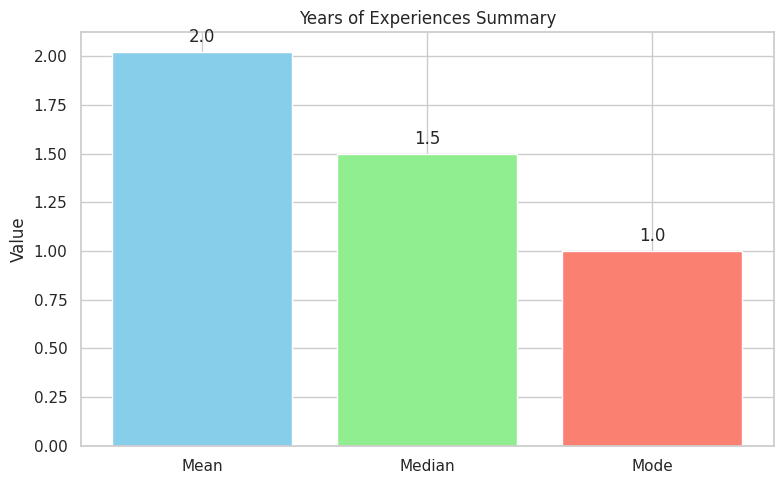

In [67]:
import matplotlib.pyplot as plt

# Values
mean_val = df_filtered['years_of_experiences'].mean()
median_val = df_filtered['years_of_experiences'].median()
mode_val = df_filtered['years_of_experiences'].mode().iloc[0]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(['Mean', 'Median', 'Mode'], [mean_val, median_val, mode_val],
               color=['skyblue', 'lightgreen', 'salmon'])

# Annotate
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y + 0.05, f'{y:.1f}', ha='center')

plt.title('Years of Experiences Summary')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


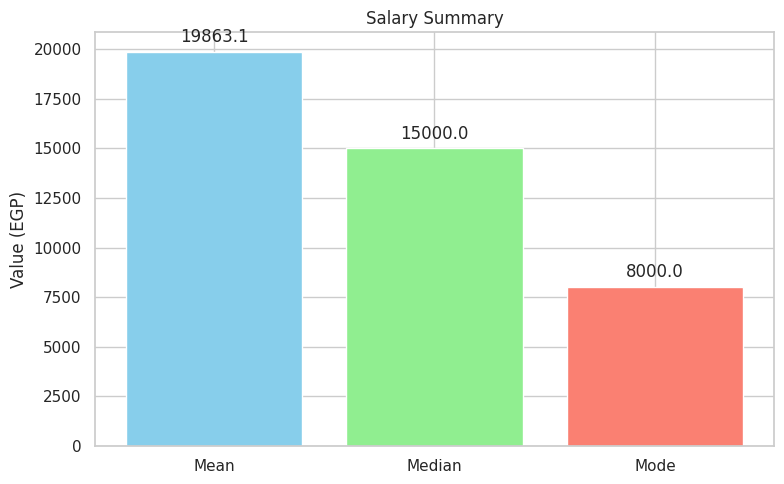

In [68]:
import matplotlib.pyplot as plt

# Values
mean_val = df_filtered['salary'].mean()
median_val = df_filtered['salary'].median()
mode_val = df_filtered['salary'].mode().iloc[0]

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(['Mean', 'Median', 'Mode'], [mean_val, median_val, mode_val],
               color=['skyblue', 'lightgreen', 'salmon'])

# Annotate
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y + 500, f'{y:.1f}', ha='center')

plt.title('Salary Summary')
plt.ylabel('Value (EGP)')
plt.tight_layout()
plt.show()


In [69]:
# Display data types for each column
print(df_filtered.dtypes)


title                     object
years_of_experiences     float64
salary                   float64
what_is_your_company      object
work_type                 object
work_hour                 object
city_of_company_site      object
developer_type            object
experience_group        category
region_type               object
dtype: object


In [70]:
df.head(30)

,title,years_of_experiences,salary,what_is_your_company,work_type,work_hour,city_of_company_site,developer_type
0,dotnet developer,2.000000,8000.0,egyptian,hybird,full time,cairo,backend
1,android developer,1.000000,10000.0,egyptian,hybird,full time,cairo,mobile
2,frontend developer | vue.js,0.000000,5000.0,non-egyptian-inside,on site,full time,mansoura,frontend
3,dot net developer,0.166667,6000.0,egyptian,on site,full time,mansoura,backend
4,raact developer,1.000000,15000.0,egyptian,remotley,full time,cairo,frontend
5,full stack developer,2.000000,5000.0,egyptian,remotley,full time,cairo,full_stack
6,full stack developer,3.000000,21000.0,egyptian,hybird,full time,cairo,full_stack
7,android developer,1.500000,9000.0,egyptian,remotley,full time,cairo,mobile
8,ios developer,1.000000,12000.0,egyptian,hybird,full time,cairo,mobile
9,dot net developer,1.000000,8000.0,egyptian,on site,full time,mansoura,backend


In [71]:
# Identify object columns (excluding numeric ones)
object_cols = df_filtered.select_dtypes(include='object').columns

# Convert each to category
df_filtered[object_cols] = df_filtered[object_cols].astype('category')

# Confirm changes
print(df_filtered.dtypes)


title                   category
years_of_experiences     float64
salary                   float64
what_is_your_company    category
work_type               category
work_hour               category
city_of_company_site    category
developer_type          category
experience_group        category
region_type             category
dtype: object


In [ ]:
print(df_filtered['work_hour'].value_counts())
print(df_filtered['work_type'].value_counts())
print(df_filtered['city_of_company_site'].value_counts())


work_hour
full time                                                                                                                                                                        290
part time                                                                                                                                                                         10
contract without an ending date and the owner is saudian and also i don't know a lot about the company so you can search about it if you want to : https://findingfromegy.net      1
full-time / initial 3 months                                                                                                                                                       1
Name: count, dtype: int64
work_type
hybrid      128
on_site     112
remotely     62
Name: count, dtype: int64
city_of_company_site
cairo               240
giza                 19
alexandria           18
mansoura             18
tanta                 3
assiut         

In [72]:
print(df_filtered.isna().sum())


title                   0
years_of_experiences    0
salary                  0
what_is_your_company    0
work_type               0
work_hour               0
city_of_company_site    0
developer_type          0
experience_group        0
region_type             0
dtype: int64


In [73]:
# Step 1: Separate full-time and part-time salary data
full_time = df_filtered[df_filtered['work_hour'] == 'full time']
part_time = df_filtered[df_filtered['work_hour'] == 'part time']

# Step 2: Sample full-time to match part-time size
balanced_full_time = full_time.sample(n=len(part_time), random_state=42)

# Step 3: Combine into a new balanced DataFrame
balanced_df = pd.concat([balanced_full_time, part_time])

# Step 4: Confirm sizes
print("Balanced sample sizes:")
print(balanced_df['work_hour'].value_counts())


Balanced sample sizes:
work_hour
full time                                                                                                                                                                        10
part time                                                                                                                                                                        10
contract without an ending date and the owner is saudian and also i don't know a lot about the company so you can search about it if you want to : https://findingfromegy.net     0
full-time / initial 3 months                                                                                                                                                      0
Name: count, dtype: int64


<ipython-input-74-2a718ad3b211>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balanced_stats = balanced_df.groupby('work_hour')['salary'].agg(
<ipython-input-74-2a718ad3b211>:37: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


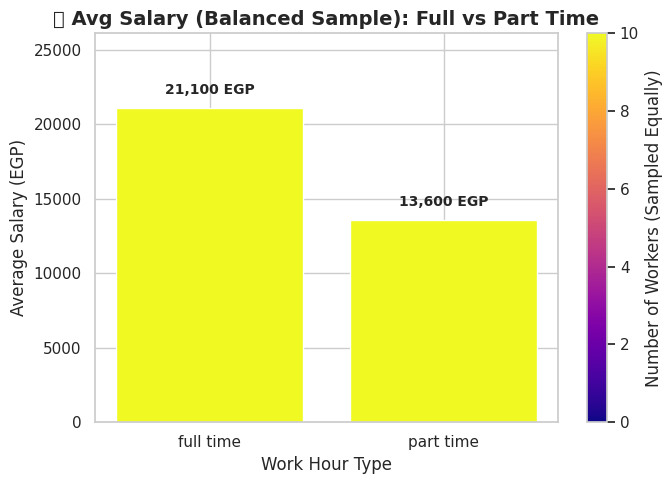

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Group balanced sample
balanced_stats = balanced_df.groupby('work_hour')['salary'].agg(
    avg_salary='mean',
    worker_count='count'
).sort_values(by='avg_salary', ascending=False)

# Step 2: Normalize color scale by worker count
norm = plt.Normalize(balanced_stats['worker_count'].min(), balanced_stats['worker_count'].max())
cmap = plt.cm.plasma
colors = cmap(norm(balanced_stats['worker_count']))

# Step 3: Create plot
fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(balanced_stats.index, balanced_stats['avg_salary'], color=colors)

# Step 4: Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Number of Workers (Sampled Equally)')

# Step 5: Value labels
for bar, value in zip(bars, balanced_stats['avg_salary']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 700,
            f'{value:,.0f} EGP', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Step 6: Final formatting
ax.set_title('💼 Avg Salary (Balanced Sample): Full vs Part Time', fontsize=14, weight='bold')
ax.set_xlabel('Work Hour Type', fontsize=12)
ax.set_ylabel('Average Salary (EGP)', fontsize=12)
ax.set_ylim(0, balanced_stats['avg_salary'].max() + 5000)

plt.tight_layout()
plt.show()


In [75]:
from scipy.stats import ttest_ind

# Filter the balanced sample
full_time_balanced = balanced_df[balanced_df['work_hour'] == 'full time']['salary']
part_time_balanced = balanced_df[balanced_df['work_hour'] == 'part time']['salary']

# Perform Welch's t-test
t_stat, p_value = ttest_ind(full_time_balanced, part_time_balanced, equal_var=False)

# Print result
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("✅ Reject the null hypothesis: There is a significant salary difference between full-time and part-time developers.")
else:
    print("❌ Fail to reject the null hypothesis: No significant salary difference between full-time and part-time developers.")


T-statistic: 1.12
P-value: 0.2780
❌ Fail to reject the null hypothesis: No significant salary difference between full-time and part-time developers.


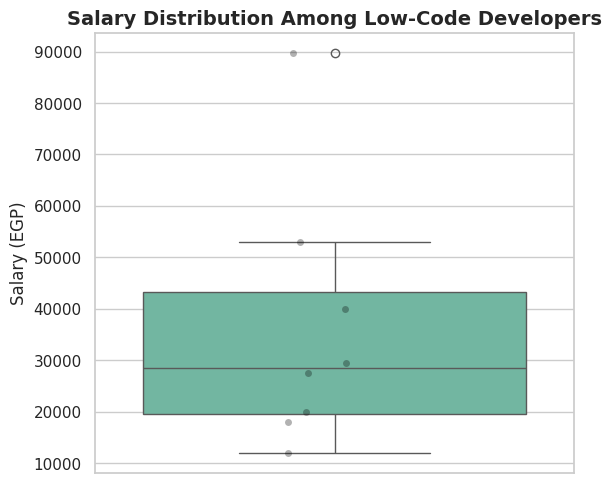

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to only low-code developers
low_code_df = df_filtered[df_filtered['developer_type'] == 'low_code']

# Plot salary distribution
plt.figure(figsize=(6, 5))
sns.boxplot(data=low_code_df, y='salary', color='#66c2a5')

# Optional: overlay individual data points
sns.stripplot(data=low_code_df, y='salary', color='black', alpha=0.3)

# Titles and labels
plt.title('Salary Distribution Among Low-Code Developers', fontsize=14, weight='bold')
plt.ylabel('Salary (EGP)')
plt.xlabel('')
plt.tight_layout()
plt.show()


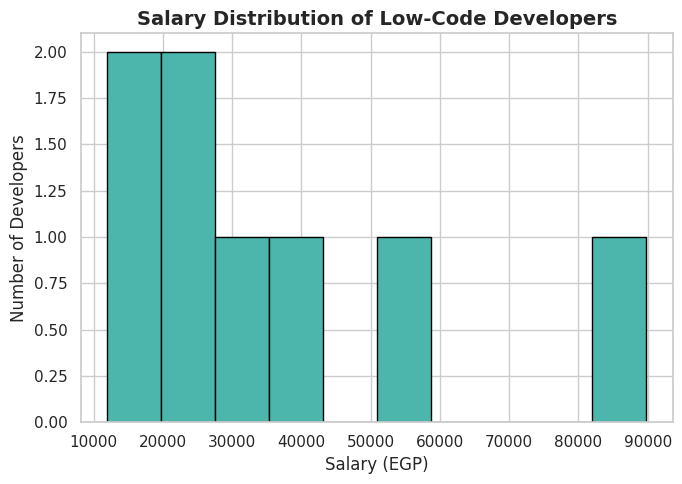

In [78]:
plt.figure(figsize=(7, 5))
plt.hist(low_code_df['salary'], bins=10, color='#4db6ac', edgecolor='black')
plt.title('Salary Distribution of Low-Code Developers', fontsize=14, weight='bold')
plt.xlabel('Salary (EGP)')
plt.ylabel('Number of Developers')
plt.tight_layout()
plt.show()


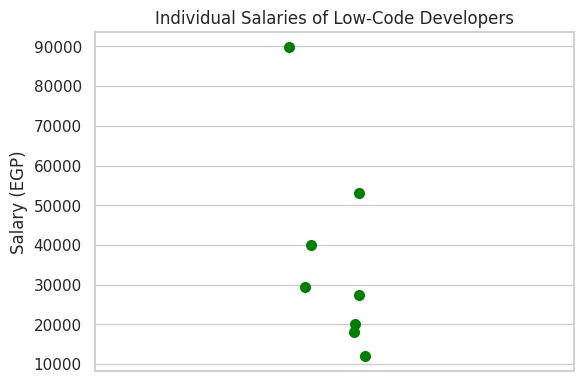

In [79]:
plt.figure(figsize=(6, 4))
sns.stripplot(y=low_code_df['salary'], color='green', jitter=True, size=8)
plt.title('Individual Salaries of Low-Code Developers')
plt.ylabel('Salary (EGP)')
plt.tight_layout()
plt.show()


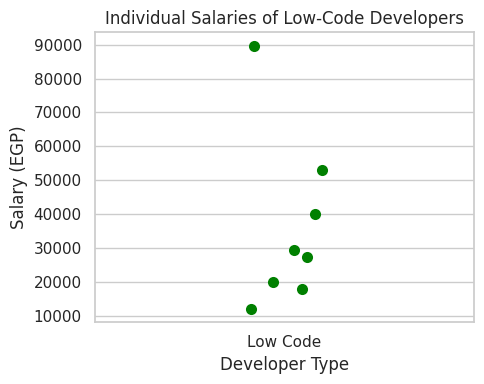

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming low_code_df is already filtered
plt.figure(figsize=(5, 4))
sns.stripplot(x=['Low Code'] * len(low_code_df), y=low_code_df['salary'], color='green', size=8)

plt.title('Individual Salaries of Low-Code Developers')
plt.xlabel('Developer Type')  # Show the x-axis label
plt.ylabel('Salary (EGP)')
plt.tight_layout()
plt.show()


In [83]:
backend_df = df_filtered[df_filtered['developer_type'] == 'backend']


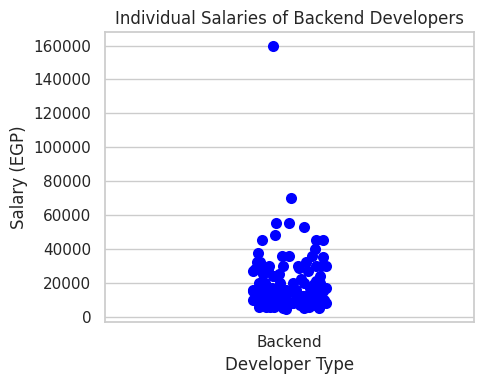

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming backend_df is already filtered for backend developers
plt.figure(figsize=(5, 4))
sns.stripplot(x=['Backend'] * len(backend_df), y=backend_df['salary'], color='blue', size=8)

plt.title('Individual Salaries of Backend Developers')
plt.xlabel('Developer Type')
plt.ylabel('Salary (EGP)')
plt.tight_layout()
plt.show()
